In [20]:
import connect_four
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Checking that everything works

In [2]:
joc = connect_four.Table()

In [3]:
joc.table

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0]])

In [4]:
joc.drop(1,1)

array([[0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0]])

In [5]:
joc.reset()

## Random games!

Play `n` games iterating over players 1 and 2 and random integer generator for the column

In [6]:
from itertools import cycle

In [7]:
# Player infinite generator
player_generator = (player for player in cycle([1,2])) 

In [8]:
next(player_generator)

1

In [34]:
joc.reset()
simulations = 1000000
results = []
for _ in range(simulations):
    rand_col_idx = np.random.randint(0,7,42)  # the game can have 42 movements max
    first_drop = rand_col_idx[0]
    player_generator = (player for player in cycle([1,2])) 
    for col_idx in rand_col_idx:
        player = next(player_generator)
        game_status = joc.drop_sim(player, col_idx)
        if game_status:
            winner_info = (player, first_drop)
            break
    results.append(winner_info)
    joc.reset()

In [37]:
len(results)

1000000

In [38]:
player_wins = [x[0] for x in results]
first_columns = [x[1] for x in results]

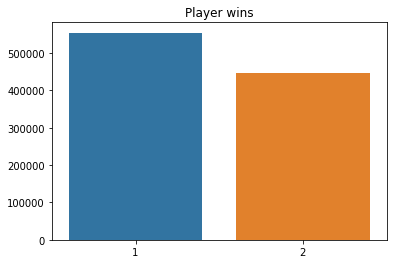

In [41]:
player_id = np.unique(player_wins, return_counts=True)[0]
n_wins = np.unique(player_wins, return_counts=True)[1]
sns.barplot(player_id, n_wins, )
plt.title('Player wins')
plt.show()

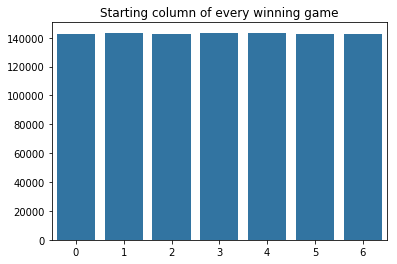

In [42]:
bars = np.unique(first_columns, return_counts=True)[1]
column_num = np.unique(first_columns, return_counts=True)[0]
sns.barplot(column_num, bars, color='C0')
plt.title('Starting column of every winning game')
plt.show()